# Random Sample Imputation (Numerical Features)

## Introduction

In real-world datasets, numerical variables frequently contain missing values due to incomplete data collection, recording errors, or system limitations. Since most machine learning algorithms cannot handle missing values directly, appropriate imputation techniques must be applied before model training.

Random Sample Imputation is a statistical technique in which each missing value is replaced with a randomly selected value from the existing (non-missing) observations of the same feature.

Unlike mean or median imputation, this method preserves the original distribution and variance of the data, making it particularly useful when maintaining natural variability is important for model performance.

---


### Import requirements 

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load Dataset  

In [21]:
df=pd.read_csv('traindata.csv',usecols=['Age','Fare','Survived'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### NUll values Checking 

In [23]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [25]:
X=df.drop(columns='Survived',axis=1)
y=df['Survived']

### Train Test Split 

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [28]:
X_test.sample(2)

,Age,Fare
174,56.0,30.6958
70,32.0,10.5000


In [29]:
X_train['Age_Imputed']=X_train['Age']
X_test['Age_Imputed']=X_test['Age']

In [30]:
X_train.head()

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


### Impute the Sample Age in null values 

In [31]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [32]:
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [33]:
X_train.head(10)

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
118,24.0,247.5208,24.0
536,45.0,26.5500,45.0
361,29.0,27.7208,29.0
29,NaN,7.8958,31.0
55,NaN,35.5000,25.0


### Distribution after and before Impution 

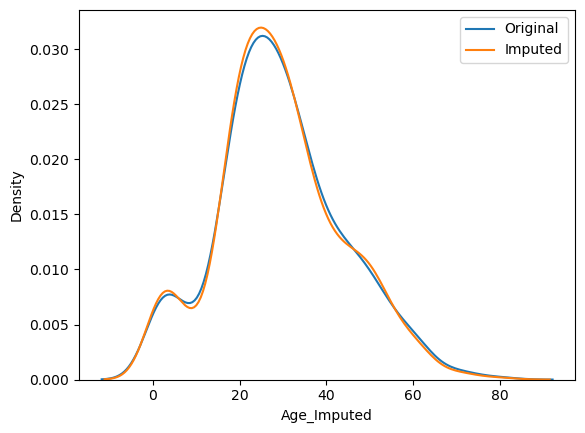

In [39]:
# check the Distribution 
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_Imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [40]:
print('Original varience',X_train['Age'].var())
print('Imputed varience',X_train['Age_Imputed'].var())

Original varience 210.2517072477438
Imputed varience 205.56764946486973


In [41]:
X_train[['Fare','Age_Imputed']].cov()

,Fare,Age_Imputed
Fare,2700.831981,61.983973
Age_Imputed,61.983973,205.567649


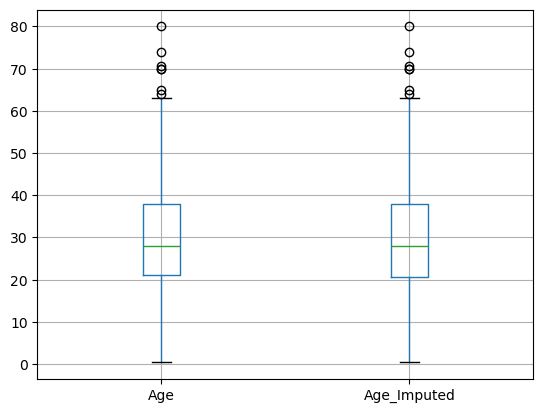

In [43]:
# check outliers 
X_train[['Age','Age_Imputed']].boxplot();